## Emma Grimm, Assignment 3

producing asemic writing programatically

In [245]:
import random
import math
from flat import document, shape, rgba
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))
from bezmerizing import Polyline
import numpy as np
from numpy.random import uniform, normal, choice
from IPython.display import Image as showimg

In [99]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

For this assignment, I first sketched out some ideas for asemic scripts. I was thinking initially about placement on the page in addition to just the form of the "letters", as you can see in the right image below, but ultimately decided against creating any sort of asemic concrete poetry, as it began to resemble a drawing too much for my taste. The two top lines of the left image below are the forms of writing I decided to focus on recreating/combining. 

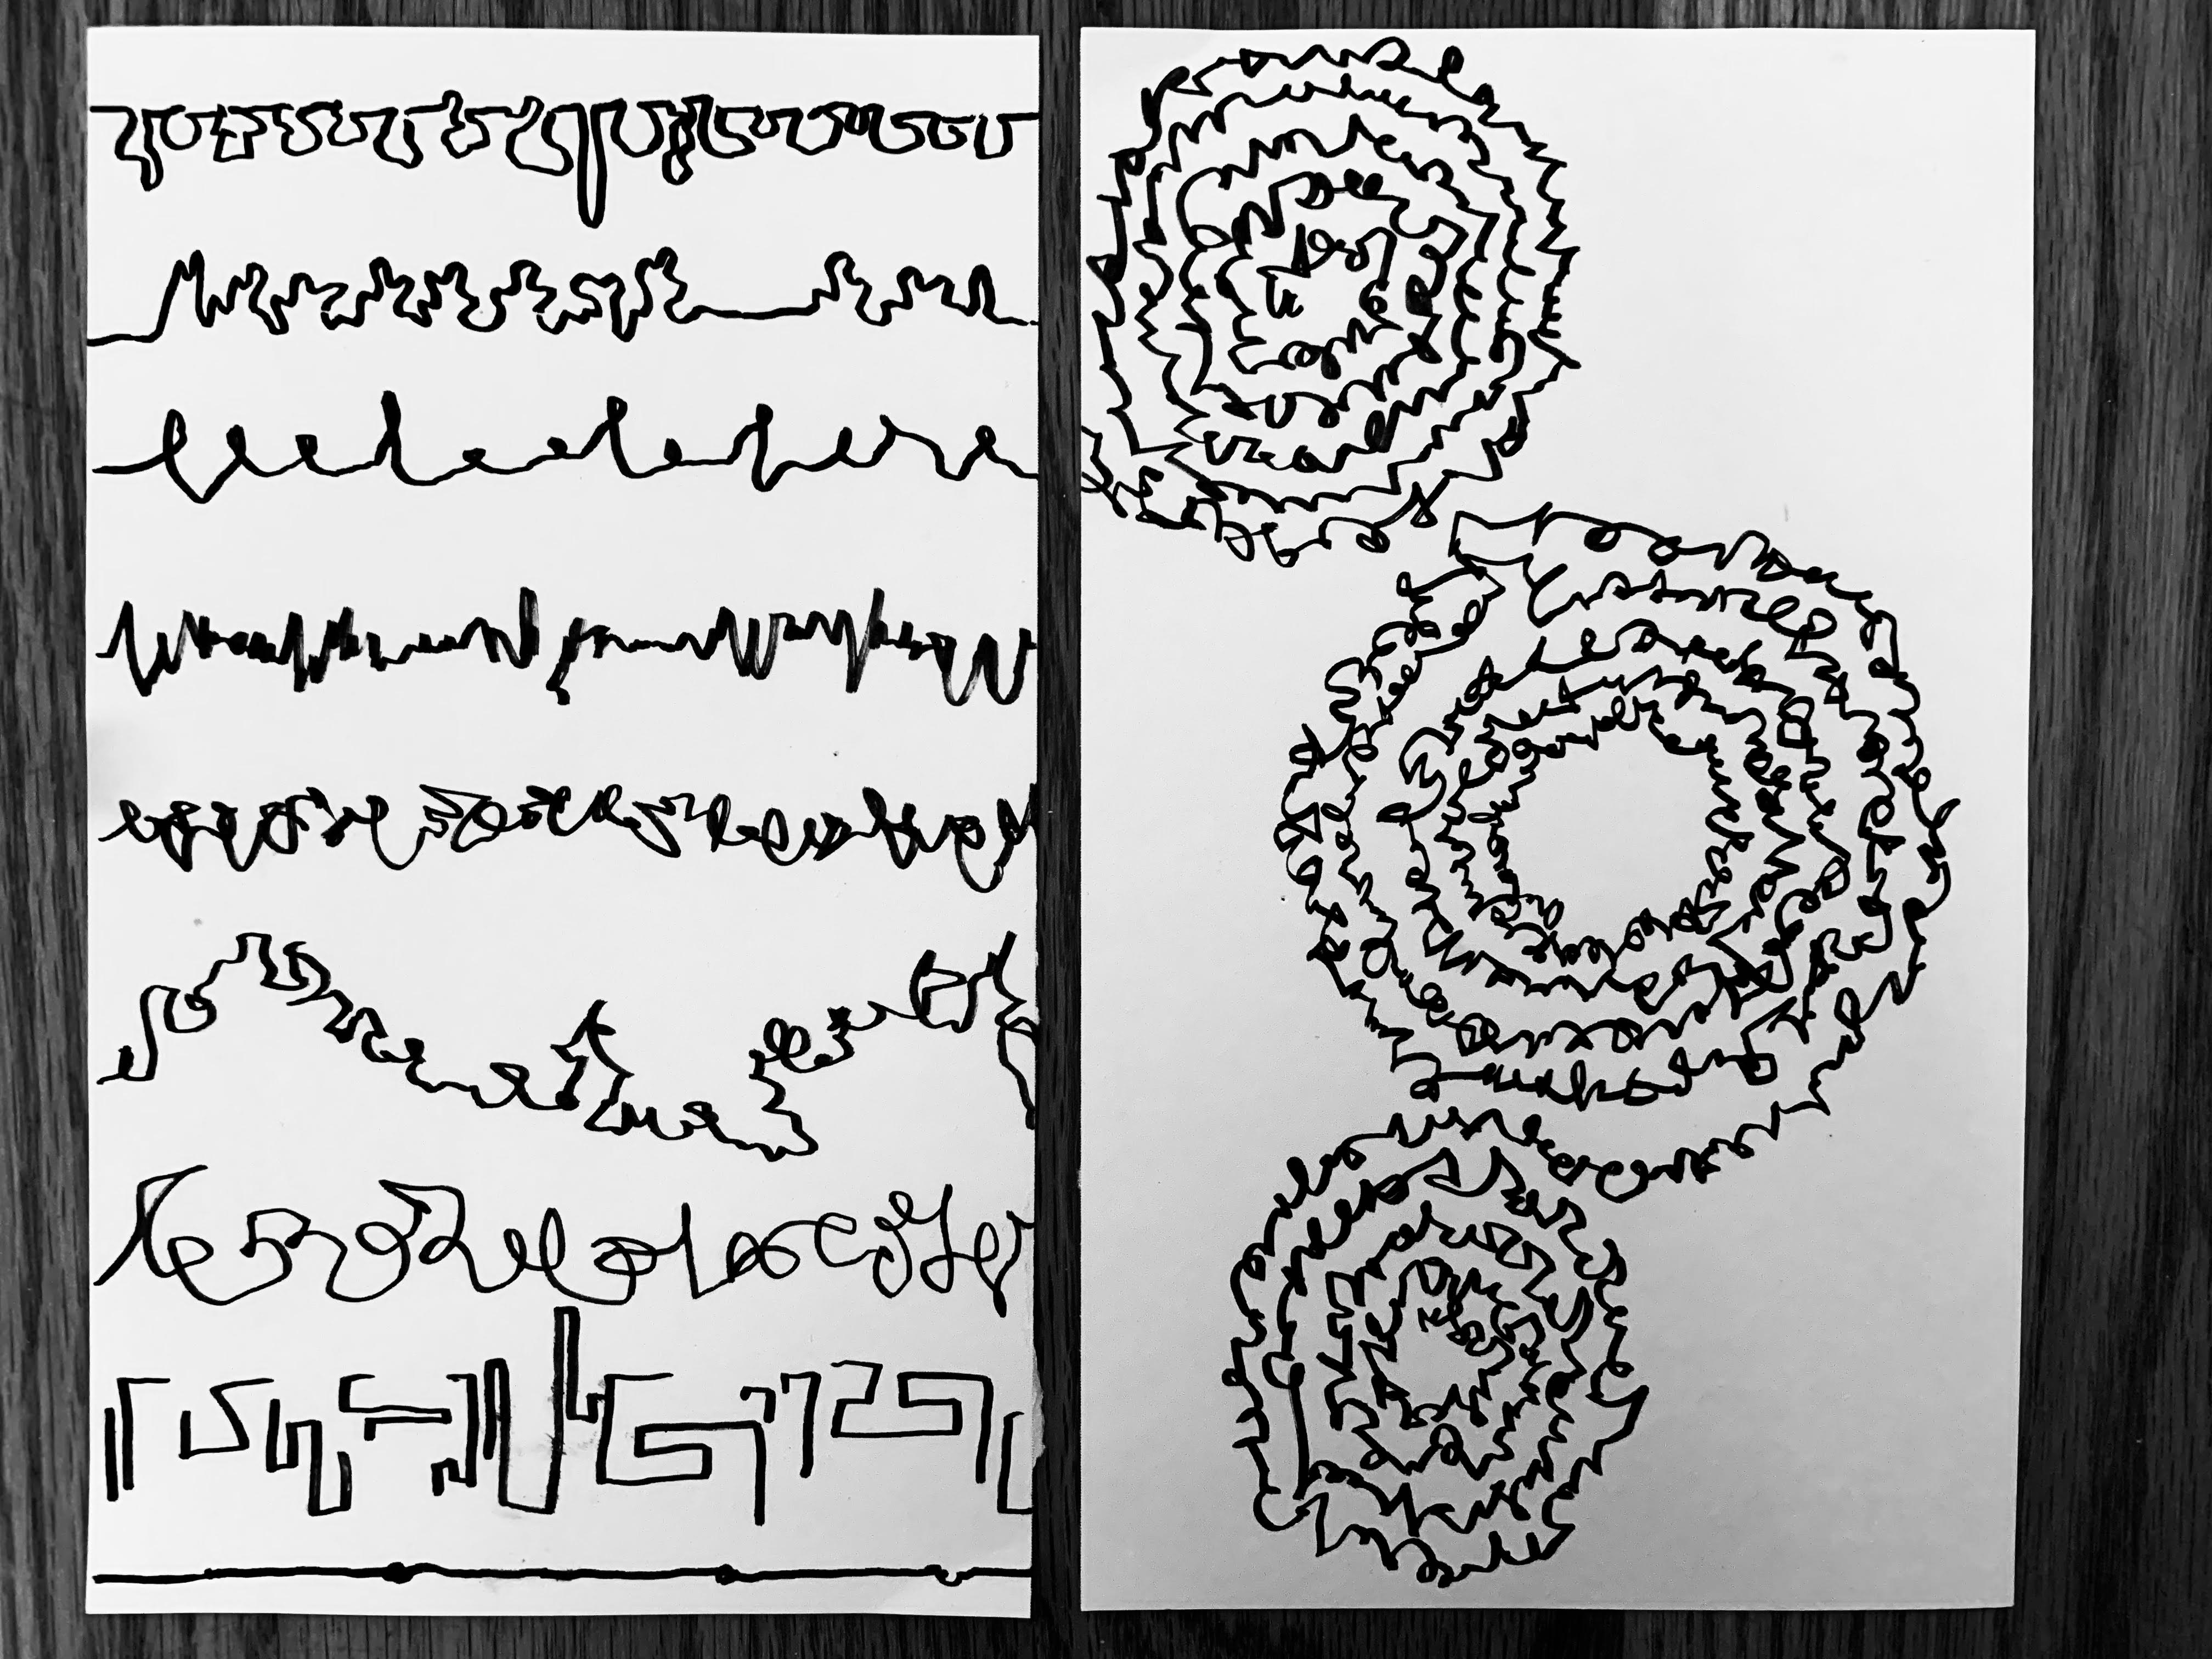

In [249]:
showimg(filename = "sketches.jpg", embed = True)

In [107]:
def make_char():
    pts = []
    pts.append([0,0])
    pts.append([0,0])
    pts.append([0.4,0])
    height = math.floor(t_normal(3,10,7,5))
    for i in range(height):
        x = 0.3 + normal(0,0.1)
        y = 0.1 * i
        pts.append([x,y])
    for i in range(3):
        x = 0.3 + 0.2*i
        y = 0.1 * height + normal(0,0.1)
        pts.append([x,y])
    for i in range(height):
        x = 0.9 + normal(0,0.1)
        y = 0.1 * (height-i)
        pts.append([x,y])
    pts.append([1,0])
    pts.append([1,0])
    return Polyline(pts)

In [108]:
size = 100
d = document(size, size, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(2).join('round')
grid_n = 8
grid_size = size / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        char_pline = make_char()
        char_path = char_pline.smooth_path()
        curve = figure.path(
            char_path.scale(grid_size*0.67).translate(3+i*grid_size, 3+j*grid_size))
        page.place(curve)
show(page)

As seen above, I initially focused on creating forms which hang in a sort of semicircle from a single horizontal line. I did not want to connect these at first, though that is the ultimate goal. The letters above are a first attempt that I threw out because I felt there were too many points in each line, making for too much of a zigzag pattern.

In [255]:
def make_char():
    pts = []
    pts.append([0,0])
    pts.append([0,0])
    pts.append([0.3,0])
    height = math.floor(t_normal(2,5,4,3))
    for i in range(height):
        x = 0.3 + normal(0,0.1)
        y = 0.2 * i
        pts.append([x,y])
    for i in range(3):
        x = 0.3 + 0.2*i
        y = 0.2 * height + normal(0,0.1)
        pts.append([x,y])
    for i in range(height):
        x = 0.9 + normal(0,0.1)
        y = 0.2 * (height-i)
        pts.append([x,y])
    pts.append([1,0])
    pts.append([1,0])
    return Polyline(pts)

In [256]:
size = 100
d = document(size, size, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(2).join('round')
grid_n = 8
grid_size = size / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        char_pline = make_char()
        char_path = char_pline.smooth_path()
        curve = figure.path(
            char_path.scale(grid_size*0.67).translate(3+i*grid_size, 3+j*grid_size))
        page.place(curve)
show(page)

For my next attempt, I decreased the number of points on each line (the one going down, then across, then up). This is starting to look more like what I wanted. However, I think that these shapes still have too much uniformity to resemble the sketches I made before. 

In [111]:
line = make_char()
for i in range(1, 10):
    line += make_char().translate(i*1.1, 0)
line = line.scale(10).translate(10, 10)
d = document(200, 30, 'mm')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).width(2)
page.place(curve_fig.path(line.smooth_path()))
show(page)

Here, you can see a few of the shapes connected in a line. I was inspired by Devanagari scripture for this project, as the letters connecting all in one horizontal line above really appeals to me. For the shapes I created, specifically, I wanted there to be a real sensation of hanging, or suspension, from that upper line, or the feeling of dipping below a uniform surface.

In [120]:
size = 150
d = document(size, size, 'mm')
page = d.addpage()
figure = shape().nostroke().fill(rgba(0, 0, 0, 255))
grid_n = 8
grid_size = size / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        char_pline = make_char().scale(grid_size * 0.67).translate(3 + i * grid_size, 3 + j * grid_size)
        poly = char_pline.fancy_curve(samples_per=12, thicknesses=[1, 1.5, 0.5, 2], tightness=-0.25)
        poly = figure.polygon(poly)
        page.place(poly)
show(page)

After getting a fairly satisfying letter shape, I started playing with the fancy_curve function to figure out how best to simulate a more natural handwritten look. This early attempt looks very disjointed, but this is due in part to the fact that the letters are not yet connected

In [121]:
line = make_char()
for i in range(1, 10):
    line += make_char().translate(i*1.1, 0)
line = line.scale(10).translate(10, 10)
d = document(200, 30, 'mm')
page = d.addpage()
poly = line.fancy_curve(samples_per=12, thicknesses=[1, 1.5, 0.5, 2], tightness=-0.25)
poly = figure.polygon(poly)
page.place(poly)
show(page)

As you can see above, it took me a moment to understand how fancy_curve works. Since I cannot treat the connected line as a single polygon if I want it to look like actual handwriting, I had to split the line up into separate polygons and then move and adjust them so they seem to be connected.

In [122]:
d = document(200, 30, 'mm')
page = d.addpage()

line = make_char()
line = line.scale(10).translate(10, 10)
poly = line.fancy_curve(samples_per=12, thicknesses=[1, 1.5, 0.5, 2], tightness=-0.25)
poly = figure.polygon(poly)
page.place(poly)
for i in range(1, 10):
    line = make_char().translate(i*1.1, 0)
    line = line.scale(10).translate(10, 10)
    poly = line.fancy_curve(samples_per=12, thicknesses=[1, 1.5, 0.5, 2], tightness=-0.25)
    poly = figure.polygon(poly)
    page.place(poly)

show(page)

Above is an attempt at joining the polygons in a line that didn't quite work out until I adjusted the numbers

In [170]:
def make_char():
    pts = []
    pts.append([0,0])
    pts.append([0,0])
    pts.append([0.3,0])
    height = math.floor(t_normal(2,5,4,3))
    for i in range(height):
        x = 0.3 + normal(0,0.1)
        y = 0.2 * i
        pts.append([x,y])
    for i in range(3):
        x = 0.3 + 0.2*i
        y = 0.2 * height + normal(0,0.1)
        pts.append([x,y])
    for i in range(height):
        x = 0.9 + normal(0,0.1)
        y = 0.2 * (height-i)
        pts.append([x,y])
    pts.append([1,0])
    pts.append([1.2,0])
    pts.append([1.2,0])
    return Polyline(pts)

In [171]:
d = document(200, 30, 'mm')
page = d.addpage()

for i in range(20):
    line = make_char().translate(i*1.1, 0)
    line = line.scale(10).translate(10, 10)
    poly = line.fancy_curve(samples_per=12, thicknesses=[0.8, 1.2, 0.5, 2, 0.8], tightness=-1)
    poly = figure.polygon(poly)
    page.place(poly)

show(page)

In [172]:
size = 200
d = document(size, size, 'mm')
page = d.addpage()

letters = []
for i in range(30):
    letters.append(make_char())

for l in range(15):
    for i in range(1,20):
        letter = random.choice(letters).translate(i*1.1,l*1.5)
        letter = letter.scale(10).translate(10,10)
        poly = letter.fancy_curve(samples_per=12, thicknesses=[1, 1.5, 0.5, 2, 1], tightness=-0.4)
        poly = figure.polygon(poly)
        page.place(poly)
        
show(page)

Above is my first simulation of a full page of asemic writing. I realized that the letters had far too much similarity for my liking and that I would have to go back into the make_char function to adjust how they are drawn.

In [173]:
def make_char():
    height = math.floor(t_normal(1,7,4,3))
    width = math.floor(t_normal(2,5,4,2))
    
    pts = []
    pts.append([0,0])
    pts.append([0,0])
    pts.append([(1 - width*0.2),0])

    for i in range(height):
        x = (1 - width*0.2) + normal(0,0.1)
        y = 0.25 * i + normal(0,0.05)
        pts.append([x,y])
    for i in range(width):
        x = (1 - width*0.2) + 0.2*i
        y = 0.2 * height + normal(0,0.1)
        pts.append([x,y])
    for i in range(height):
        x = 1 + normal(0,0.1)
        y = 0.25 * (height-i) + normal(0,0.05)
        pts.append([x,y])
    pts.append([1,0])
    pts.append([1.2,0])
    pts.append([1.2,0])
    return Polyline(pts)

In [179]:
d = document(200, 30, 'mm')
page = d.addpage()

for i in range(20):
    line = make_char().translate(i*1.2, 0)
    line = line.scale(10).translate(10, 10)
    poly = line.fancy_curve(samples_per=12, thicknesses=[0.8, t_normal(1.2,1.7,1.5,0.2), t_normal(0.3,0.7,0.5,0.2), t_normal(1.5,2,1.8,0.3), 0.8], tightness=-0.5)
    poly = figure.polygon(poly)
    page.place(poly)

show(page)

These shapes have much more of a unique character and resemble the ones I sketched out initially as I was playing with different ideas. This made it clear to me that I should have recurring shapes that are recognizable in order to give the appearance of writing.

In [182]:
size = 200
d = document(size, size, 'mm')
page = d.addpage()

letters = []
for i in range(25):
    letters.append(make_char())

for l in range(15):
    for i in range(1,20):
        letter = random.choice(letters).translate(i*1.2,l*1.7)
        letter = letter.scale(10).translate(10,10)
        poly = letter.fancy_curve(samples_per=12, thicknesses=[0.8, t_normal(1.2,1.7,1.5,0.2), t_normal(0.3,0.7,0.5,0.2), t_normal(1.5,2,1.8,0.3), 0.8], tightness=-0.4)
        poly = figure.polygon(poly)
        page.place(poly)
        
show(page) 

In [189]:
def make_char(startY, endY):
    height = math.floor(t_normal(1,7,4,3))
    width = math.floor(t_normal(2,5,4,2))
    
    pts = []
    pts.append([0,startY])
    pts.append([0,startY])
    pts.append([(1 - width*0.2),startY + normal(0,0.05)])

    for i in range(height):
        x = (1 - width*0.2) + normal(0,0.1)
        y = 0.25 * i + normal(0,0.05)
        pts.append([x,y])
    for i in range(width):
        x = (1 - width*0.2) + 0.2*i
        y = 0.2 * height + normal(0,0.1)
        pts.append([x,y])
    for i in range(height):
        x = 1 + normal(0,0.1)
        y = 0.25 * (height-i) + normal(0,0.05)
        pts.append([x,y])
    pts.append([1,endY])
    pts.append([1.2,endY])
    pts.append([1.2,endY])
    return Polyline(pts)

In [190]:
d = document(200, 30, 'mm')
page = d.addpage()

startY = t_normal(-0.2,0.2,0,0.3)
endY = 0

for i in range(20):
    endY = t_normal(-0.2,0.2,0,0.3)
    
    line = make_char(startY, endY).translate(i*1.2, 0)
    line = line.scale(10).translate(10, 10)
    poly = line.fancy_curve(samples_per=12, thicknesses=[0.8, t_normal(1.2,1.7,1.5,0.2), t_normal(0.3,0.7,0.5,0.2), t_normal(1.5,2,1.8,0.3), 0.8], tightness=-0.5)
    poly = figure.polygon(poly)
    page.place(poly)
    
    startY = endY

show(page)

I decided to adjust the start and end points of each character so that the horizontal line would not feel so rigid/programatically generated, and so that there is more of an organic feeling of letters spilling or dancing across the page. However, I now face my great tragedy: out of my 3 main features for this scripts (choosing letters from a premade alphabet, having variable line thickness, and joining the characters in a non-rigid horizontal line), I could only ever have two, due to the way I had modified make_char and the way in which fancy_curve works to generate a polygon.

In [192]:
size = 200
d = document(size, size, 'mm')
page = d.addpage()

startY = t_normal(-0.2,0.2,0,0.3)
endY = 0

letters = []
for i in range(25):
    endY = t_normal(-0.2,0.2,0,0.3)
    letters.append(make_char(startY, endY))
    startY = endY

for l in range(15):
    for i in range(20):
        letter = random.choice(letters).translate(i*1.2,l*1.7)
        letter = letter.scale(10).translate(10,10)
        poly = letter.fancy_curve(samples_per=12, thicknesses=[0.8, t_normal(1.2,1.7,1.5,0.2), t_normal(0.3,0.7,0.5,0.2), t_normal(1.5,2,1.8,0.3), 0.8], tightness=-0.4)
        poly = figure.polygon(poly)
        page.place(poly)
        
show(page) 

See here: all my boxes are checked, but the characters, of course, can't connect.

In [211]:
d = document(300, 200, 'mm')
page = d.addpage()

startY = t_normal(-0.2,0.2,0,0.3)
endY = 0

letters = []
for i in range(25):
    endY = t_normal(-0.2,0.2,0,0.3)
    letters.append(make_char(startY, endY))
    startY = endY

for l in range(15):
    line = random.choice(letters).translate(0,l*1.7)
    
    offset = 0
    
    for w in range(random.randint(3,5)):
        
        wordlength = 0
        
        for i in range(1,random.randint(3,6)):
            line += random.choice(letters).translate(offset + i*1.2,l*1.7)
            wordlength += 1.2
        
        offset += wordlength + 1.2
            
        
    line = line.scale(10).translate(10,10)
    curve_fig = shape().stroke(rgba(0, 0, 0, 255)).width(2)
    page.place(curve_fig.path(line.smooth_path()))
        
show(page) 

I ultimately decided I could make the concession in not having variable line thickness for the body text in order to have a continuous joined line and a generated alphabet from which letters are chosen. Words can be seen simulated above.

In [235]:
d = document(200, 30, 'mm')
page = d.addpage()

startY = t_normal(-0.2,0.2,0,0.3)
endY = 0

for i in range(20):
    endY = t_normal(-0.2,0.2,0,0.3)
    
    line = make_char(startY, endY).translate(i*1.2, 0)
    line = line.scale(10).translate(5, 5)
    poly = line.fancy_curve(samples_per=12, thicknesses=[0.8, t_normal(1.2,1.7,1.5,0.2), t_normal(0.3,0.7,0.5,0.2), t_normal(1.5,2,1.8,0.3), 0.8], tightness=-0.5)
    poly = figure.polygon(poly)
    page.place(poly)
    
    startY = endY

with open("title.png", "wb") as fh:
    fh.write(page.image(ppi=50, kind="rgba").png())

In [244]:
d = document(200, 100, 'mm')
page = d.addpage()

startY = t_normal(-0.2,0.2,0,0.3)
endY = 0

letters = []
for i in range(25):
    endY = t_normal(-0.2,0.2,0,0.3)
    letters.append(make_char(startY, endY))
    startY = endY

for l in range(5):
    line = random.choice(letters).translate(0,l*1.7)
    
    offset = 0
    
    for w in range(random.randint(3,5)):
        
        wordlength = 0
        
        for i in range(1,random.randint(3,6)):
            line += random.choice(letters).translate(offset + i*1.2,l*1.7)
            wordlength += 1.2
        
        offset += wordlength + 1.2
            
        
    line = line.scale(10).translate(5,5)
    curve_fig = shape().stroke(rgba(0, 0, 0, 255)).width(2)
    page.place(curve_fig.path(line.smooth_path()))

with open("text.png", "wb") as fh:
    fh.write(page.image(ppi=50, kind="rgba").png())

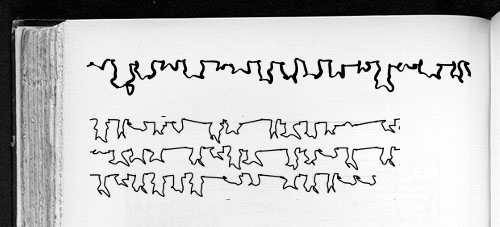

In [253]:
showimg(filename = "assignment3.jpg", embed = True, width = 600)

Here is the final product displayed as if on a page. I am fairly happy with it, although I'm still working on potentially changing the make_char function to support all the format preferences I have for the lettering!